In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
hotels = pd.read_excel("../Data/HotelCustomersDataset.xlsx")

hotels["date"] =  (pd.to_datetime("2018-12-31")
                   - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64[ns]")

In [3]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


# Assignment 1: Plotting DataFrames

* Plot the `LodgingRevenue` and `OtherRevenue` columns in a line chart from the `monthly_revenue` DataFrame created below.  
* Make sure your x-axis is the `date` column.

In [4]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
)

monthly_revenue = daily_revenue.resample("M").sum()



C:\Users\matwa\AppData\Local\Temp\ipykernel_7940\3021583118.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = daily_revenue.resample("M").sum()


# Assignment 2: Formatted Line Chart

Plot the monthly sum of `LodgingRevenue` and `OtherRevenue`.

Make sure to add titles and a y-axis label, remove the top and right borders, and add a legend.

Consider modifying the font sizes as well.

Thanks!

In [5]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
)

monthly_revenue = daily_revenue.resample("M").sum()


C:\Users\matwa\AppData\Local\Temp\ipykernel_7940\2262483525.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = daily_revenue.resample("M").sum()


In [6]:
monthly_revenue.head()

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35


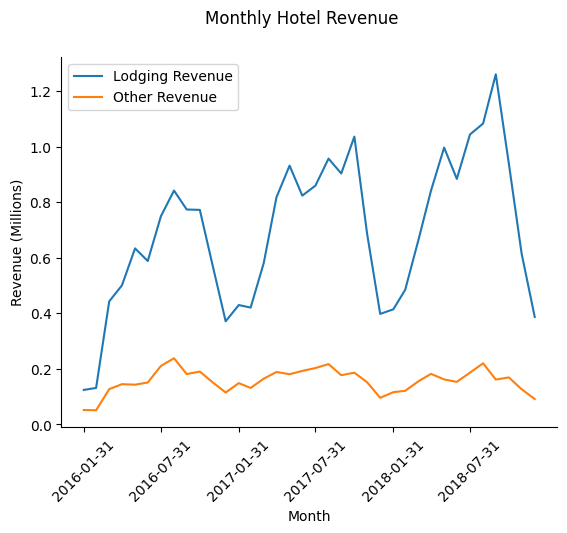

In [7]:
fig, ax = plt.subplots()

fig.suptitle("Monthly Hotel Revenue")

ax.plot(monthly_revenue.index,
        monthly_revenue["LodgingRevenue"] / 1e6,
        label="Lodging Revenue")
ax.plot(monthly_revenue.index,
        monthly_revenue["OtherRevenue"] / 1e6,
        label="Other Revenue")

ax.set_xlabel("Month")
ax.set_ylabel("Revenue (Millions)")

ax.legend(loc="upper left")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_xticks(monthly_revenue.index[::6])
plt.xticks(rotation=45)

plt.show()

# Assignment 2: Dual Axis Line Chart

* Plot the sum of nights booked and the sum of cancellations on a quarterly basis (resample("Q") will help). 

* Plot them in the same chart but different Y-Axes.

* Make sure to add titles and axis labels, remove scientific notation, and add a legend.

* Consider modifying the font sizes as well.

Thanks!

*Note: I accidentally repeated the assignment numbers, but leaving as is to align with video numbering*

In [8]:
room_nights = hotels.groupby("date").agg({"RoomNights": "sum", "BookingsCanceled": "sum"})
quarterly_bookings = room_nights.resample("Q").sum()

C:\Users\matwa\AppData\Local\Temp\ipykernel_7940\832523507.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_bookings = room_nights.resample("Q").sum()


In [9]:
quarterly_bookings.head(2)

,RoomNights,BookingsCanceled
date,,
2016-03-31,8464,15
2016-06-30,15535,26


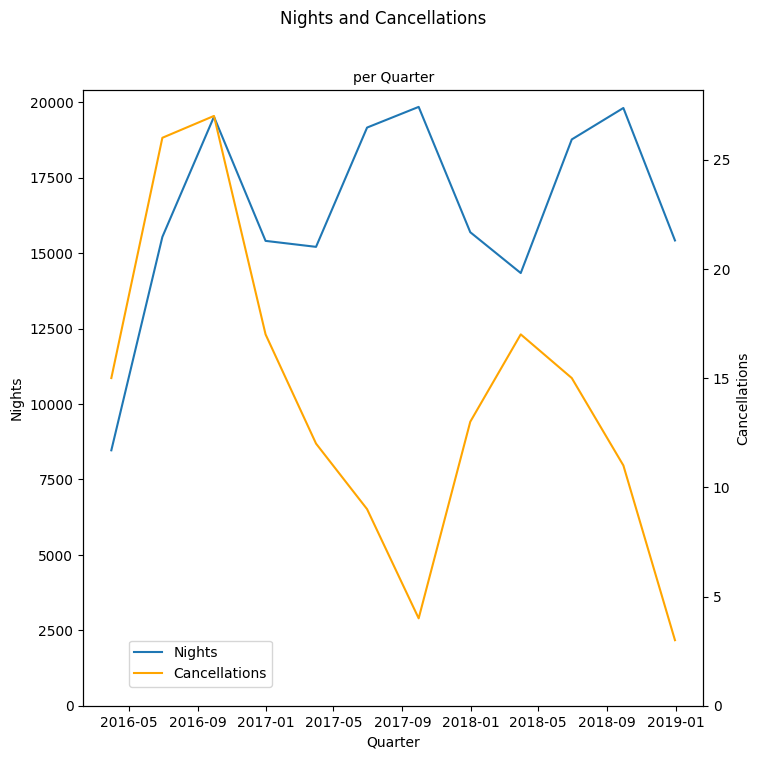

In [10]:
fig, ax = plt.subplots(figsize = (8, 8))

fig.suptitle("Nights and Cancellations")
ax.set_title("per Quarter",
             fontsize = 10)

ax.plot(quarterly_bookings["RoomNights"],
        label = "Nights")
ax.set_xlabel("Quarter")
ax.set_ylabel("Nights")
ax.set_ylim(0)

ax2 = ax.twinx()
ax2.plot(quarterly_bookings["BookingsCanceled"],
         label = "Cancellations",
         color = "orange")
ax2.set_ylabel("Cancellations")
ax2.set_ylim(0)

fig.legend(bbox_to_anchor = (.37, .2))

plt.show()

# Assignment 3: Bar Chart

* Create a bar chart of total room nights booked by country. Limit your results to the top 10 countries.

* Then, build a horizontal bar chart of lodging revenue by country for the same countries in your room nights chart.

* As always, make sure to add labels to your chart!

In [11]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [12]:
countries = (hotels
    .groupby("Nationality")
    .agg({"RoomNights": "sum", "LodgingRevenue": "sum"})
    .sort_values("RoomNights", ascending=False)
    .iloc[:10]
)

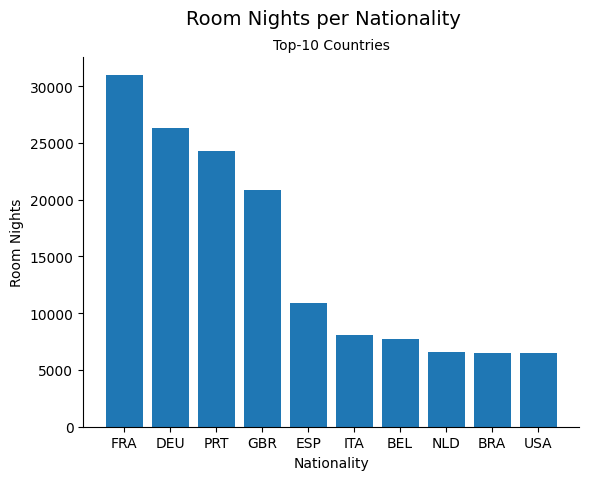

In [13]:
fig, ax = plt.subplots()

fig.suptitle("Room Nights per Nationality",fontsize=14)
ax.set_title("Top-10 Countries", fontsize=10)

ax.bar(
    x=countries.index,
    height=countries["RoomNights"]
)

ax.set_xlabel("Nationality")
ax.set_ylabel("Room Nights")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

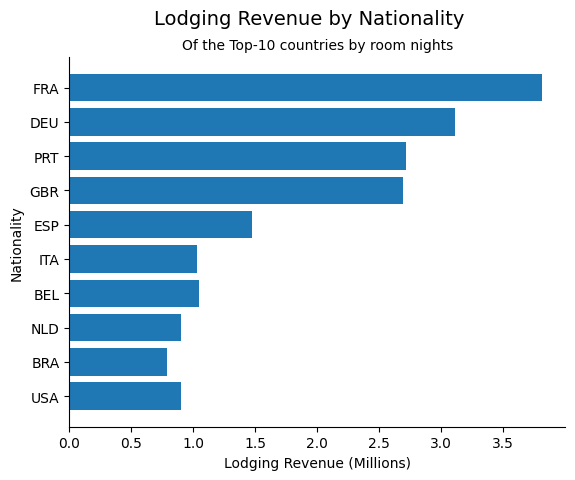

In [14]:
fig, ax = plt.subplots()

fig.suptitle("Lodging Revenue by Nationality",
             fontsize=14)
ax.set_title("Of the Top-10 countries by room nights",
             fontsize=10)

ax.barh(
    y=countries.index[::-1],
    width=countries["LodgingRevenue"][::-1] / 1e6
)

ax.set_ylabel("Nationality")
ax.set_xlabel("Lodging Revenue (Millions)")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

# Assignment 4: Advanced Bar Charts

* Build a grouped bar chart of our top 5 countries with LodgingRevenue and OtherRevenue as bars for each.
* Then, build a 100% bar chart stacked bar chart of LodgingRevenue and OtherRevenue. Add a reference line at 80%, which is our baseline. 

Thanks!

In [15]:
countries = ["FRA", "DEU", "PRT", "GBR", "ESP"]

country_subset = (hotels
    .groupby("Nationality")
    .agg({"LodgingRevenue": "sum", "OtherRevenue": "sum"})
    .sort_values("LodgingRevenue", ascending=False)
    .iloc[:5]
)
country_subset.head()

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,3809315.59,1033166.30
DEU,3113382.55,725541.53
PRT,2715008.72,665634.58
GBR,2693123.61,591212.77
ESP,1475909.33,319840.82


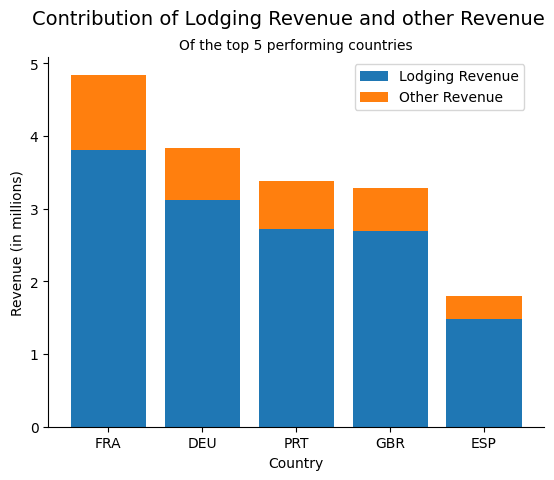

In [16]:
fig, ax = plt.subplots()

fig.suptitle("Contribution of Lodging Revenue and other Revenue", fontsize=14)
ax.set_title("Of the top 5 performing countries", fontsize=10)

ax.bar(
    country_subset.index,
    country_subset["LodgingRevenue"] / 1e6,
    label="Lodging Revenue"
)

ax.bar(
    country_subset.index,
    country_subset["OtherRevenue"] / 1e6,
    label="Other Revenue",
    bottom=country_subset["LodgingRevenue"] / 1e6
)

ax.set_xlabel("Country")
ax.set_ylabel("Revenue (in millions)")

fig.legend(bbox_to_anchor=(.88, .88))

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

In [17]:
country_subset["LodgingRevenueRelative"] = country_subset["LodgingRevenue"] / (country_subset["LodgingRevenue"] + country_subset["OtherRevenue"]) * 100
country_subset["OtherRevenueRelative"] = country_subset["OtherRevenue"] / (country_subset["LodgingRevenue"] + country_subset["OtherRevenue"]) * 100

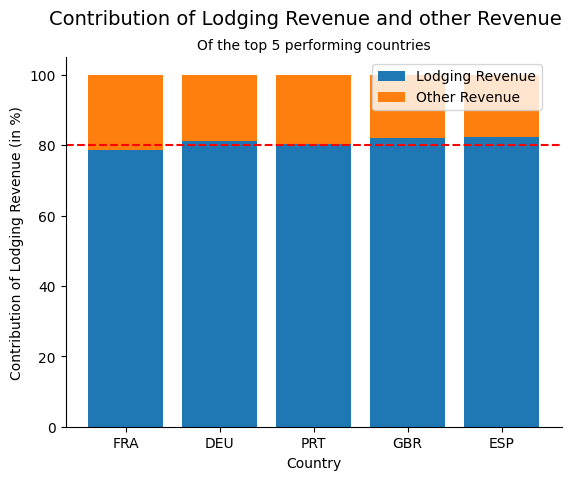

In [18]:
fig, ax = plt.subplots()

fig.suptitle("Contribution of Lodging Revenue and other Revenue", fontsize=14)
ax.set_title("Of the top 5 performing countries", fontsize=10)

ax.bar(
    country_subset.index,
    country_subset["LodgingRevenueRelative"],
    label="Lodging Revenue"
)

ax.bar(
    country_subset.index,
    country_subset["OtherRevenueRelative"],
    label="Other Revenue",
    bottom=country_subset["LodgingRevenueRelative"]
)

ax.set_xlabel("Country")
ax.set_ylabel("Contribution of Lodging Revenue (in %)")

ax.axhline(y=80, linestyle="--", color="red")

fig.legend(bbox_to_anchor=(.88, .88))

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

# Assignment 5: Pie Charts

* Build a pie chart of LodgingRevenue by country. Include a slice for our top 5 countries and combine the rest into an 'other' Category.
* Then, convert the pie chart into a donut chart.

In [38]:
country_rev = (hotels.
    groupby("Nationality").
    agg({"LodgingRevenue":"sum"})
    .sort_values("LodgingRevenue", ascending=False)
)

other = pd.DataFrame({"LodgingRevenue": country_rev.iloc[5:, 0].sum()}, index=["OTH"])
top_5 = pd.concat([country_rev.iloc[:5], other])

top_5

,LodgingRevenue
FRA,3809315.59
DEU,3113382.55
PRT,2715008.72
GBR,2693123.61
ESP,1475909.33
OTH,11170126.66


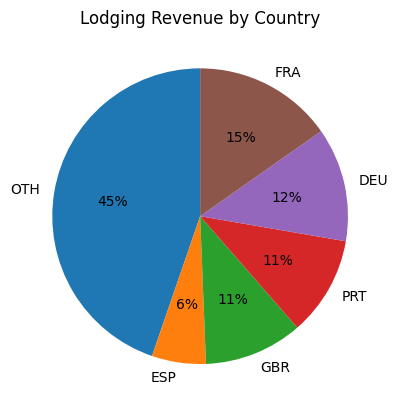

In [48]:
fig, ax = plt.subplots()

ax.pie(
    top_5["LodgingRevenue"][::-1],
    startangle=90,
    labels=top_5.index[::-1],
    autopct="%.0f%%"
)

ax.set_title("Lodging Revenue by Country")

plt.show()

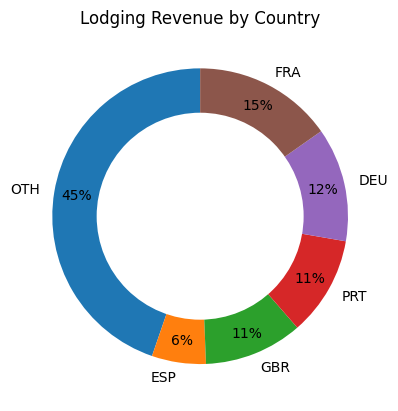

In [49]:
fig, ax = plt.subplots()

ax.set_title("Lodging Revenue by Country")

ax.pie(
    top_5["LodgingRevenue"][::-1],
    startangle=90,
    labels=top_5.index[::-1],
    autopct="%.0f%%",
    pctdistance=.85
)

hole = plt.Circle((0, 0), .7, fc="white")
fig = plt.gcf()

# Adding Cirle in Pie chart
fig.gca().add_artist(hole)

plt.show()

# Assignment 6: Scatterplots & Histograms

* Build a scatterplot comparing average nights stayed by country to average revenue per customer by country.
* Then, build a bubble chart by specifying the size of the bubbles as the average nightly revenue.
* Finally, build a histogram comparing customer age in Germany to the Customer age in france. Make sure to tweak your alpha!

Column Creation Code:

<mark style="background-color: black">
    hotels.assign(total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"],
                      revenue_per_night = lambda x: x["total_revenue"] / x["RoomNights"])</mark>


Thanks!

In [58]:
hotels = hotels.assign(total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"],
                      revenue_per_night = lambda x: x["total_revenue"] / x["RoomNights"])

In [80]:
agg_hotels = (hotels
    .groupby("Nationality")
    .agg(total_revenue = ("total_revenue", "sum"),
         avg_revenue = ("total_revenue", "mean"),
         avg_age = ("Age", "mean"),
         avg_nights = ("RoomNights", "mean"),
         avg_nightly_revenue = ("revenue_per_night", "mean")
    )
)

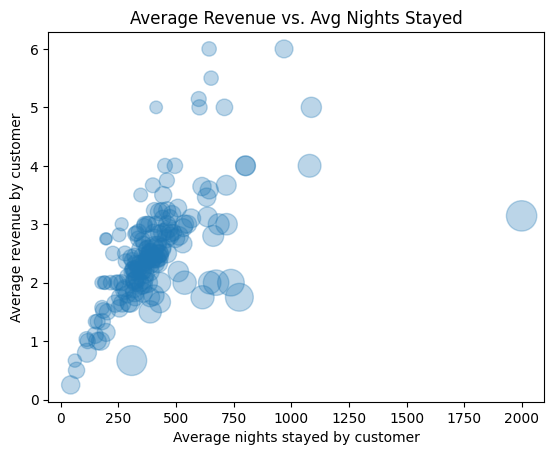

In [83]:
fig, ax = plt.subplots()

ax.set_title("Average Revenue vs. Avg Nights Stayed")

ax.scatter(
    agg_hotels["avg_revenue"],
    agg_hotels["avg_nights"],
    s=agg_hotels["avg_nightly_revenue"],
    alpha=.3
)

ax.set_xlabel("Average nights stayed by customer")
ax.set_ylabel("Average revenue by customer")

plt.show()

In [77]:
age = hotels.loc[hotels["Nationality"].isin(["DEU", "FRA"]), ["Nationality", "Age"]]
age.head()

,Nationality,Age
2,DEU,31.0
3,FRA,60.0
4,FRA,51.0
7,FRA,32.0
8,FRA,42.0


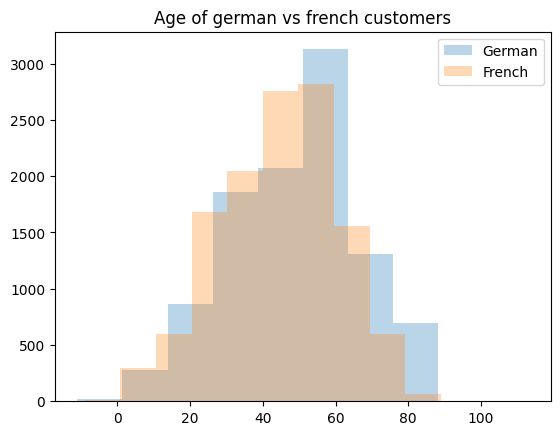

In [79]:
fig, ax = plt.subplots()

ax.set_title("Age of german vs french customers")

ax.hist(
    age.loc[age["Nationality"] == "DEU", "Age"],
    bins=10,
    alpha=.3
)

ax.hist(
    age.loc[age["Nationality"] == "FRA", "Age"],
    bins=10,
    alpha=.3
)

ax.legend(labels=["German", "French"])

plt.show()